In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples,silhouette_score




In [2]:
df=pd.read_csv("data.csv")
df

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971


In [3]:
labels=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=labels.fit_transform(df[i])
df

,Company,Date,Close/Last,Volume,Open,High,Low
0,0,1353,6244,50520160,6066,6196,6187
1,0,1333,6177,41616240,6024,6135,5939
2,0,1325,6173,41342340,6029,6136,5943
3,0,1317,5967,60750250,5838,6149,5920
4,0,1310,5913,46638120,5826,5900,5876
...,...,...,...,...,...,...,...
25155,6,1397,10836,33395351,10806,11176,10775
25156,6,1390,11067,76792963,10842,11468,10965
25157,6,1382,11512,44791095,11407,11695,11294
25158,6,1361,11572,18098750,11420,11678,11517


In [4]:
X=df

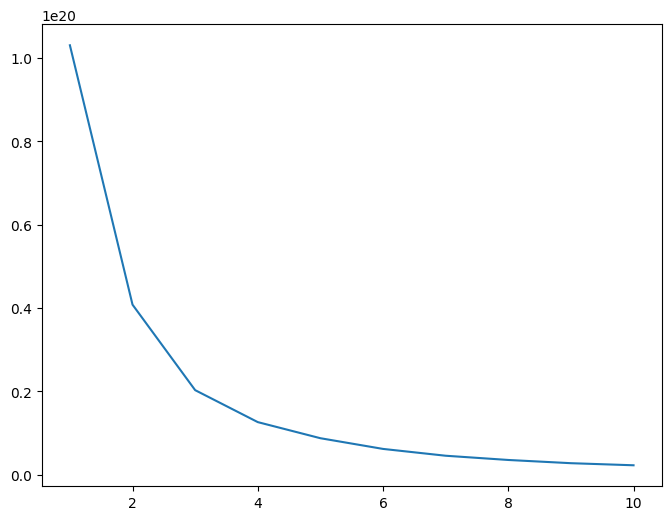

In [5]:
msc=[]
km=range(1,11)
for k in range(1,11):
    kmm=KMeans(n_clusters=k,random_state=42)
    kmm.fit(X)
    msc.append(kmm.inertia_)
msc
plt.figure(figsize=[8,6])
plt.plot(km,msc)
plt.show()

In [6]:
model=KMeans(n_clusters=2,random_state=42)
model.fit(X)


,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [7]:
model.n_iter_

13

In [8]:
label=model.labels_

In [9]:
c=model.cluster_centers_

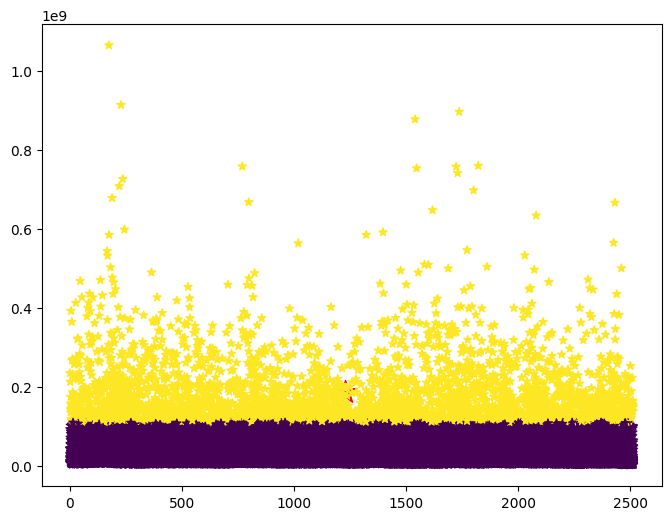

In [10]:
plt.figure(figsize=[8,6])
plt.scatter(c[:,1],c[:,3],marker="*",s=300,c="r")
plt.scatter(df["Date"],df["Volume"],c=label,marker="*",)
plt.show()

In [11]:
Score = silhouette_score(X,label)
Score

0.736118142467127

In [12]:
value=silhouette_samples(X,label)
value
clu=[]
for k in range(model.n_clusters):
    clu.append(value[label==k].mean())
clu

[np.float64(0.7774426643374422), np.float64(0.4319042893766142)]

In [13]:
df

,Company,Date,Close/Last,Volume,Open,High,Low
0,0,1353,6244,50520160,6066,6196,6187
1,0,1333,6177,41616240,6024,6135,5939
2,0,1325,6173,41342340,6029,6136,5943
3,0,1317,5967,60750250,5838,6149,5920
4,0,1310,5913,46638120,5826,5900,5876
...,...,...,...,...,...,...,...
25155,6,1397,10836,33395351,10806,11176,10775
25156,6,1390,11067,76792963,10842,11468,10965
25157,6,1382,11512,44791095,11407,11695,11294
25158,6,1361,11572,18098750,11420,11678,11517


In [14]:
new=pd.DataFrame({
    "Company":labels.fit_transform(["NFLX"]),
    "Date":[1353],
    "Close/Last":[6244],
    "Volume":[50520160],
    "Open":[6066],
    "High":[6196],
    "Low":[6187]

})
n=model.predict(new)
n

array([0], dtype=int32)